In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/mental_health_dataset.csv")
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


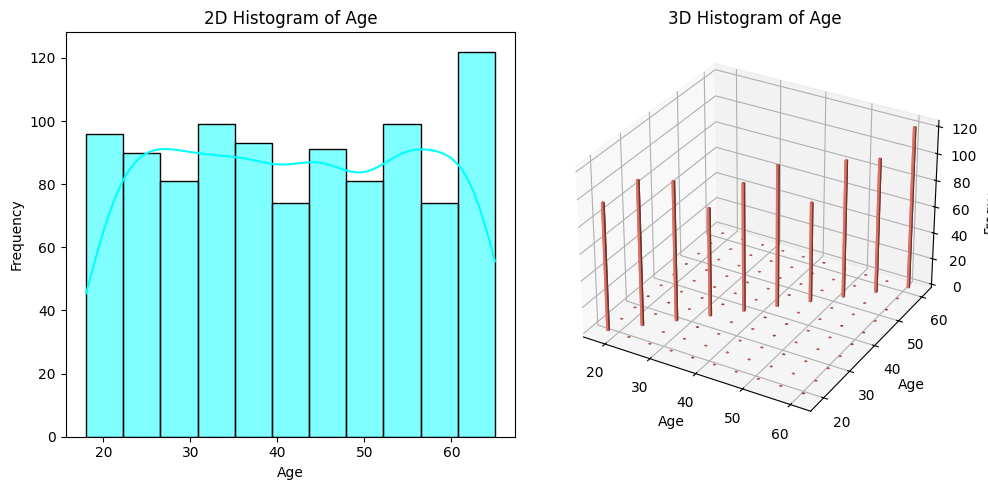

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='cyan', edgecolor='black')
plt.title('2D Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2, projection='3d')
hist, xedges, yedges = np.histogram2d(df['Age'], df['Age'], bins=10)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax = plt.gca()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='salmon')
ax.set_xlabel('Age')
ax.set_ylabel('Age')
ax.set_zlabel('Frequency')
plt.title('3D Histogram of Age')
plt.tight_layout()
plt.show()

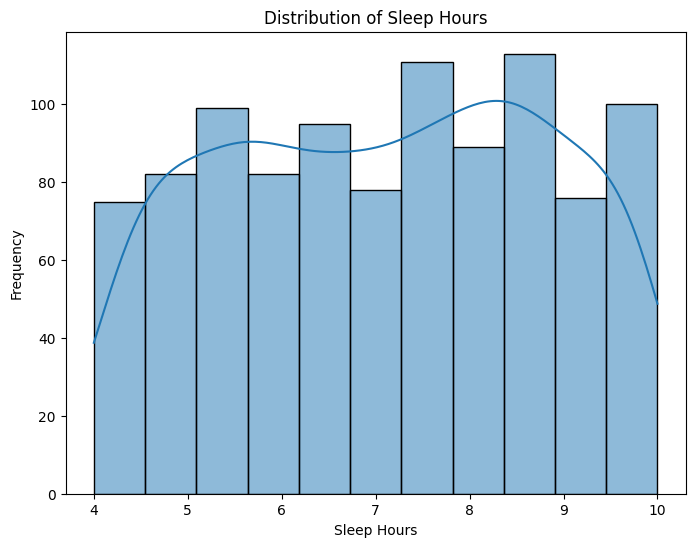

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep_Hours'], kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

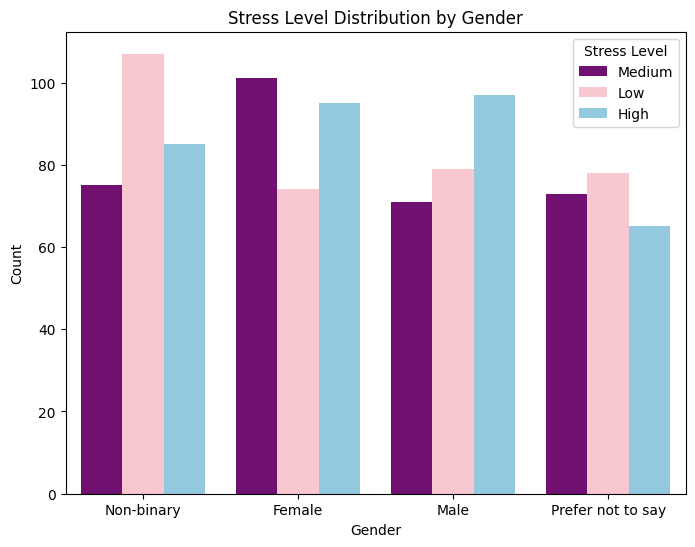

In [17]:
plt.figure(figsize=(8, 6))
custom_palette = {'High': 'skyblue', 'Low': 'pink', 'Medium': 'purple'}
sns.countplot(data=df, x='Gender', hue='Stress_Level',palette=custom_palette)
plt.title('Stress Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stress Level')
plt.show()

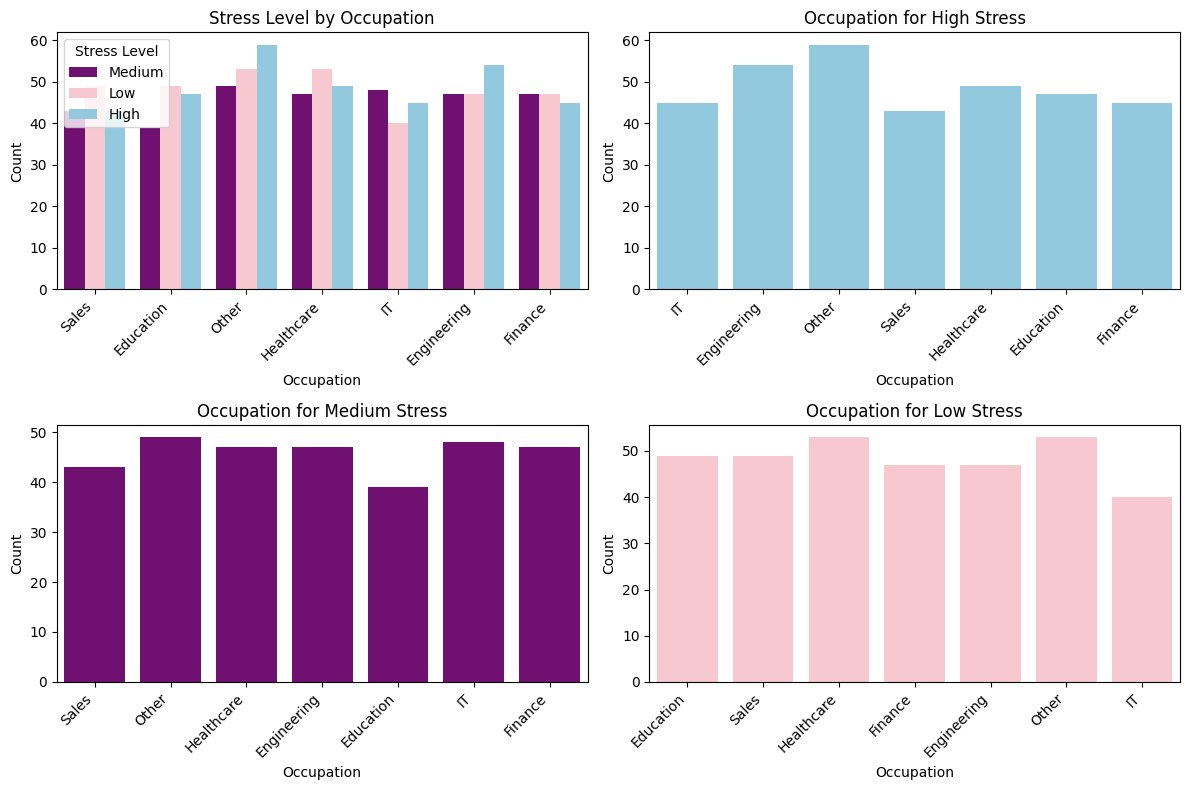

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {'High': 'skyblue', 'Low': 'pink', 'Medium': 'purple'}

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Occupation', hue='Stress_Level', palette=custom_palette)
plt.title('Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stress Level')

stress_levels = ['High', 'Medium', 'Low']
for i, stress_level in enumerate(stress_levels):
    plt.subplot(2, 2, i + 2)
    subset = df[df['Stress_Level'] == stress_level]
    sns.countplot(data=subset, x='Occupation', color=custom_palette[stress_level])
    plt.title(f'Occupation for {stress_level} Stress')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

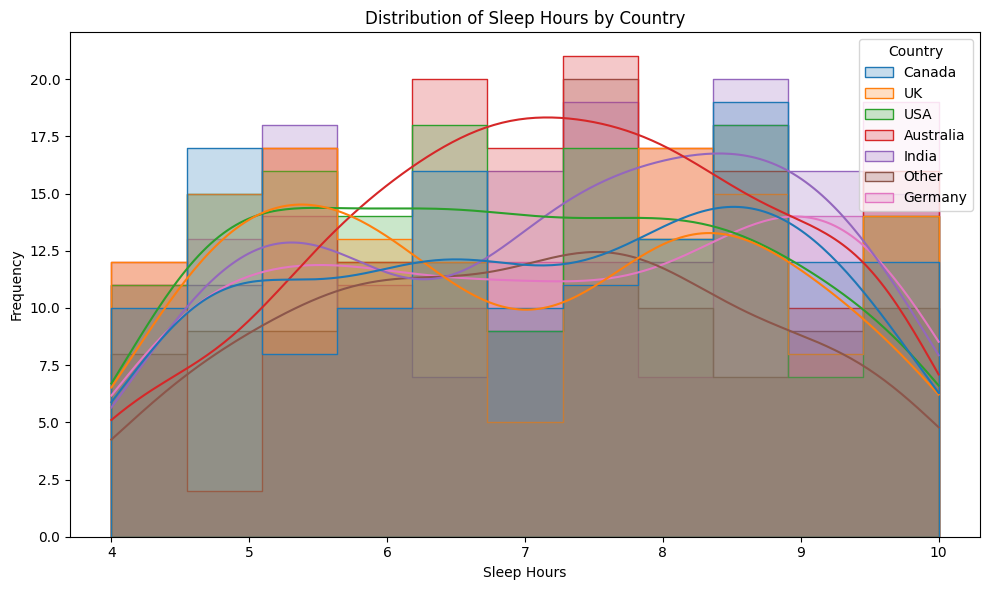

In [43]:
if 'Country' in df.columns and 'Physical_Activity_Hours' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Sleep_Hours', hue='Country', kde=True, element="step")
    plt.title('Distribution of Sleep Hours by Country')
    plt.xlabel('Sleep Hours')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Country' or 'Physical_Activity_Hours' column not found in the DataFrame.")